In [1]:
import xarray as xr
import xesmf as xe
import numpy as np
import dask
import os
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.dates import DateFormatter
from matplotlib.ticker import FuncFormatter
import geopandas as gpd

In [2]:
PATH_TO_SHAPEFILE = '/home/giantstep2/rjones98/data/WorldCountriesBoundaries/99bfd9e7-bb42-4728-87b5-07f8c8ac631c2020328-1-1vef4ev.lu5nk.shp'
countries = gpd.read_file(PATH_TO_SHAPEFILE)

# Output Maps

Below are maps of the U-Net output, as well as the WWLLN lightning (labeled observed) for the same time period. Load in the daasets from wherever the AI ready dataset as well as the output datasets were stored.

Text(0.5, 1.0, 'August Mean Lightning\nObserved')

<Figure size 640x480 with 0 Axes>

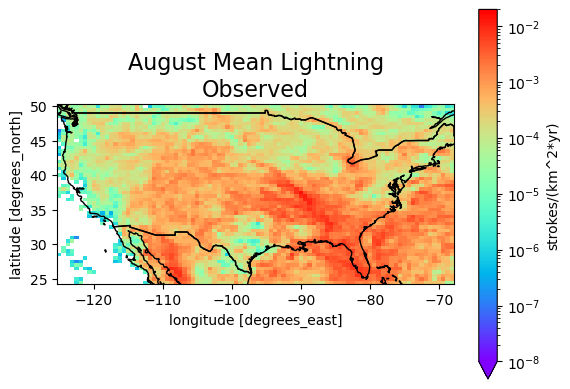

In [31]:
ds = xr.open_dataset('/home/giantstep5/rjones98/meteorology/ESS569/ai_ready/ds_jja.nc')
cp = xr.open_dataset('/home/giantstep5/rjones98/meteorology/ESS569/output/cp_cnn.nc')
cp_aer = xr.open_dataset('/home/giantstep5/rjones98/meteorology/ESS569/output/cp_aer_cnn.nc')

fig = plt.figure(figsize=(6.4,4.8))
base = countries.plot(color=(1,1,1,0.0), edgecolor='black',zorder=2)
ds.sel(time=slice('2023-08-01', '2023-08-31')).isel(lat=slice(0, 52), lon=slice(0, 92)).ltg.mean(dim='time').plot(ax=base,cmap='rainbow',zorder=1,norm=colors.LogNorm(vmin=1E-8, vmax=2E-2),cbar_kwargs={'label': 'strokes/(km^2*yr)'})
plt.title('August Mean Lightning\nObserved', fontsize = 16)

Text(0.5, 1.0, 'August Mean Lightning\nModeled without Aerosols')

<Figure size 640x480 with 0 Axes>

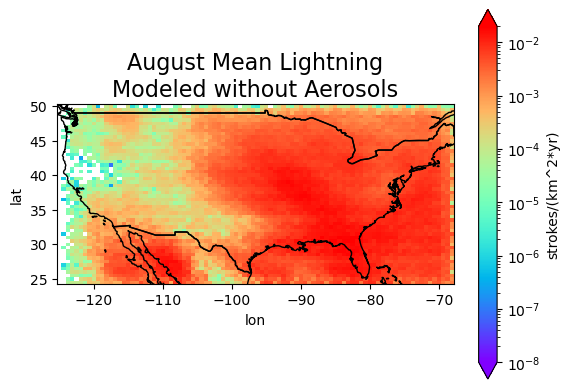

In [32]:
fig = plt.figure(figsize=(6.4,4.8))
base = countries.plot(color=(1,1,1,0.0), edgecolor='black',zorder=2)
cp.sel(time=slice('2023-08-01', '2023-08-31')).isel(lat=slice(0, 52), lon=slice(0, 92)).ltg.mean(dim='time').plot(ax=base,cmap='rainbow',zorder=1,norm=colors.LogNorm(vmin=1E-8, vmax=2E-2),cbar_kwargs={'label': 'strokes/(km^2*yr)'})
plt.title('August Mean Lightning\nModeled without Aerosols', fontsize = 16)

Text(0.5, 1.0, 'August Mean Lightning\nModeled with Aerosols')

<Figure size 640x480 with 0 Axes>

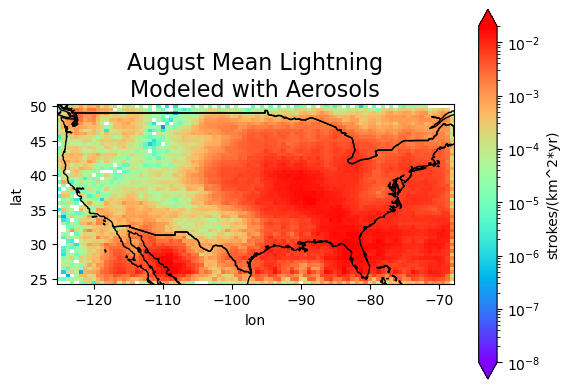

In [22]:
fig = plt.figure(figsize=(6.4,4.8))
base = countries.plot(color=(1,1,1,0.0), edgecolor='black',zorder=2)
cp_aer.sel(time=slice('2023-08-01', '2023-08-31')).isel(lat=slice(0, 52), lon=slice(0, 92)).ltg.mean(dim='time').plot(ax=base,cmap='rainbow',zorder=1,norm=colors.LogNorm(vmin=1E-8, vmax=2E-2),cbar_kwargs={'label': 'strokes/(km^2*yr)'})
plt.title('August Mean Lightning\nModeled with Aerosols', fontsize = 16)

# Validation Curves

The training and validation loss values were taken from the notebook "CNN.ipynb". After the model is run, the values were copied and used to make the plots.

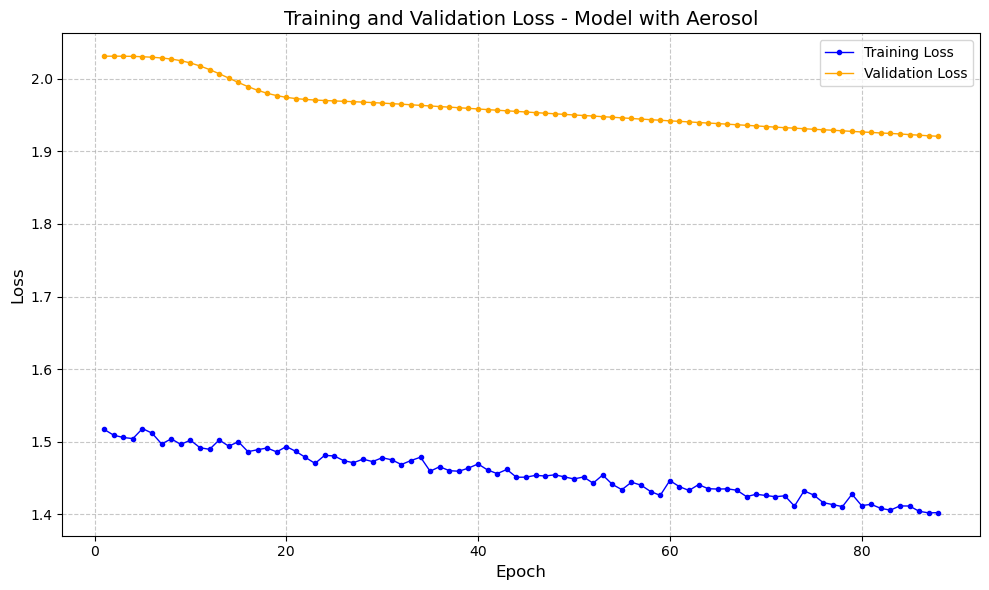

In [29]:
import matplotlib.pyplot as plt
training_loss = [
    1.5171318054199219, 1.5091520249843597, 1.5060147643089294, 1.5044454038143158, 
    1.5182214081287384, 1.5119855403900146, 1.497069388628006, 1.504095733165741, 
    1.4965332746505737, 1.5023110806941986, 1.4919100403785706, 1.4896864891052246, 
    1.5026283264160156, 1.494025707244873, 1.5001857280731201, 1.4864965975284576, 
    1.4891112744808197, 1.4915632605552673, 1.48611381649971, 1.4935468435287476, 
    1.4868455529212952, 1.4785595536231995, 1.4703214764595032, 1.4813949763774872, 
    1.4805695712566376, 1.474056214094162, 1.471275418996811, 1.4761637449264526, 
    1.4728235006332397, 1.4781205356121063, 1.4752616882324219, 1.4688073694705963, 
    1.474241316318512, 1.4788857102394104, 1.4595834910869598, 1.4657850861549377, 
    1.460328608751297, 1.4595486223697662, 1.463876098394394, 1.4695621132850647, 
    1.461239218711853, 1.4562857449054718, 1.4619950652122498, 1.4512977302074432, 
    1.4513628780841827, 1.4538933336734772, 1.4529830515384674, 1.4546191096305847, 
    1.4518057703971863, 1.4489124715328217, 1.4516615271568298, 1.4431301355361938, 
    1.4543565511703491, 1.4415110349655151, 1.434156894683838, 1.4444474875926971, 
    1.4403762221336365, 1.4316006898880005, 1.4263267517089844, 1.4467014372348785, 
    1.4383336305618286, 1.4331042766571045, 1.4411449134349823, 1.4355213046073914, 
    1.4349966943264008, 1.4353240430355072, 1.4333775043487549, 1.4245814979076385, 
    1.4278669655323029, 1.4261963963508606, 1.424456626176834, 1.425743579864502, 
    1.4114859402179718, 1.4325140416622162, 1.426828920841217, 1.416343092918396, 
    1.4135930240154266, 1.410821944475174, 1.4279436767101288, 1.412261039018631, 
    1.4139882028102875, 1.4084377586841583, 1.4060239791870117, 1.4117890298366547, 
    1.411678820848465, 1.4044134020805359, 1.4022187888622284, 1.4025974571704865
]
validation_loss = [
    2.0307778120040894, 2.0308582186698914, 2.030776023864746, 2.030572474002838, 
    2.0301058292388916, 2.0293821692466736, 2.0283820629119873, 2.0268977880477905, 
    2.0246527791023254, 2.0215070843696594, 2.01738178730011, 2.012371003627777, 
    2.0067209601402283, 2.000679135322571, 1.9946368932724, 1.9889466762542725, 
    1.9839269518852234, 1.9798068404197693, 1.9765633940696716, 1.9741779565811157, 
    1.9724823236465454, 1.9713055491447449, 1.9704647660255432, 1.9698293209075928, 
    1.9692495465278625, 1.968735694885254, 1.9681832194328308, 1.9676017761230469, 
    1.9669504165649414, 1.966267704963684, 1.9655200242996216, 1.964779019355774, 
    1.9639647006988525, 1.9631427526474, 1.9623326063156128, 1.9614835977554321, 
    1.9607255458831787, 1.9598950147628784, 1.9590386748313904, 1.9581783413887024, 
    1.957286775112152, 1.956440031528473, 1.9556257724761963, 1.9548252820968628, 
    1.9540202617645264, 1.9531364440917969, 1.9523555040359497, 1.9515650272369385, 
    1.950722098350525, 1.949914276599884, 1.9491925835609436, 1.9484278559684753, 
    1.9475520253181458, 1.9467991590499878, 1.9459715485572815, 1.9451062083244324, 
    1.9442472457885742, 1.943446695804596, 1.9426804780960083, 1.9417994022369385, 
    1.941142201423645, 1.9403738975524902, 1.9395415782928467, 1.9387875199317932, 
    1.9380972981452942, 1.9372408390045166, 1.936473309993744, 1.9356553554534912, 
    1.934889018535614, 1.934006690979004, 1.9331623911857605, 1.9324161410331726, 
    1.9317373037338257, 1.9309874176979065, 1.9302160739898682, 1.929558515548706, 
    1.928899109363556, 1.928130328655243, 1.9273076057434082, 1.9265518188476562, 
    1.9259117245674133, 1.9251229166984558, 1.9245264530181885, 1.9237760305404663, 
    1.922881305217743, 1.922108769416809, 1.921248733997345, 1.9206002950668335
]

epochs = list(range(1, len(training_loss) + 1))
# Plot
plt.figure(figsize=(10, 6))
plt.plot(epochs, training_loss, label='Training Loss', color='blue', marker='o', markersize=3, linewidth=1)
plt.plot(epochs, validation_loss, label='Validation Loss', color='orange', marker='o', markersize=3, linewidth=1)

# Labels and Title
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Training and Validation Loss - Model with Aerosol', fontsize=14)
plt.legend()
plt.grid(visible=True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


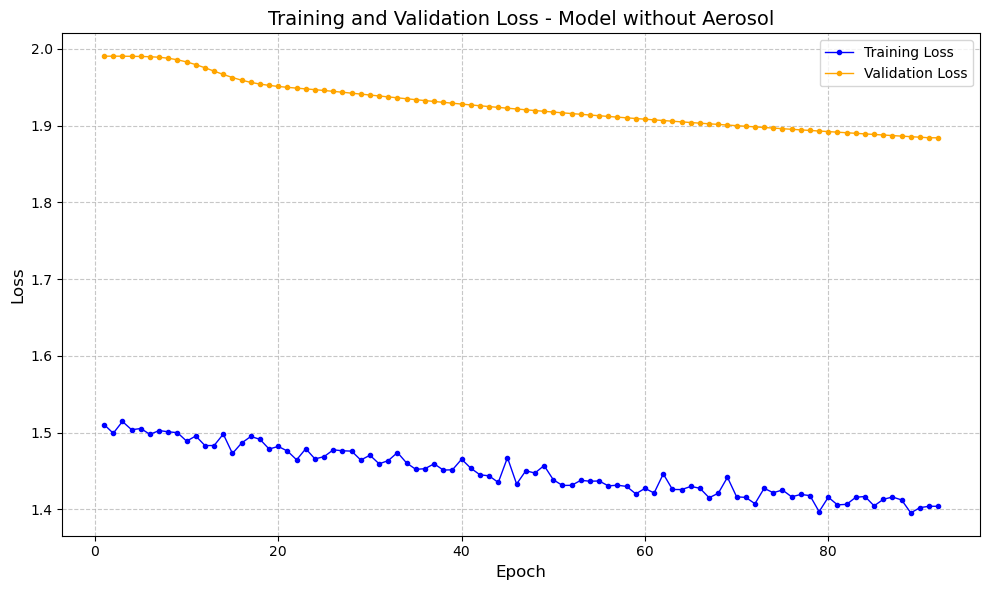

In [34]:
training_loss = [
    1.510502189397812, 1.4992033541202545, 1.5145569741725922, 1.50379878282547, 
    1.5054110884666443, 1.4977684915065765, 1.502721518278122, 1.501112312078476, 
    1.4999671876430511, 1.4889505803585052, 1.4956606924533844, 1.4831797778606415, 
    1.4832371473312378, 1.498135358095169, 1.472897231578827, 1.4864843487739563, 
    1.4950143098831177, 1.4913583397865295, 1.478663831949234, 1.4820763766765594, 
    1.4760111570358276, 1.4646444022655487, 1.4790588021278381, 1.4657813608646393, 
    1.4687591195106506, 1.477650374174118, 1.4763811528682709, 1.4759490489959717, 
    1.4643230140209198, 1.4705913662910461, 1.4594108164310455, 1.4635966420173645, 
    1.4741369783878326, 1.4604804813861847, 1.4522186517715454, 1.453028380870819, 
    1.4594317376613617, 1.451292484998703, 1.4515827000141144, 1.4654341340065002, 
    1.4537169635295868, 1.4451185464859009, 1.4437321424484253, 1.4350973963737488, 
    1.4674885272979736, 1.433085858821869, 1.4503149092197418, 1.4474194943904877, 
    1.4571437239646912, 1.438657969236374, 1.431239753961563, 1.4313932955265045, 
    1.4379124641418457, 1.4367241561412811, 1.4370547831058502, 1.430705577135086, 
    1.4315433502197266, 1.4299752712249756, 1.4202690720558167, 1.4274289906024933, 
    1.4213872849941254, 1.4463005065917969, 1.425993651151657, 1.42587211728096, 
    1.4299364686012268, 1.4275797307491302, 1.4152237474918365, 1.4210538566112518, 
    1.4418949782848358, 1.416397601366043, 1.415661782026291, 1.4074358344078064, 
    1.4274918735027313, 1.4217616617679596, 1.4253065884113312, 1.41643625497818, 
    1.4195046424865723, 1.4180067479610443, 1.3970665335655212, 1.4159246981143951, 
    1.405942142009735, 1.4066300094127655, 1.4158474206924438, 1.416826456785202, 
    1.4046286940574646, 1.413146436214447, 1.41616752743721, 1.4123481512069702, 
    1.3954881429672241, 1.402329295873642, 1.4041032791137695, 1.4040908813476562
]
validation_loss = [
    1.9903730154037476, 1.9904364347457886, 1.9903671145439148, 1.9902347922325134, 
    1.990056037902832, 1.989726185798645, 1.9890313148498535, 1.9877541661262512, 
    1.985741913318634, 1.982936978340149, 1.9794134497642517, 1.9753223061561584, 
    1.970944583415985, 1.9666226506233215, 1.9626161456108093, 1.95914226770401, 
    1.9563189148902893, 1.954105257987976, 1.9523659348487854, 1.9510002732276917, 
    1.9498432874679565, 1.948815405368805, 1.9478291273117065, 1.9468099474906921, 
    1.9457311034202576, 1.9446049928665161, 1.9434428811073303, 1.9422443509101868, 
    1.941039264202118, 1.9398159980773926, 1.938596248626709, 1.9373793601989746, 
    1.9361634254455566, 1.9349565505981445, 1.9337677359580994, 1.9326032400131226, 
    1.9314346313476562, 1.9302974939346313, 1.929160714149475, 1.928037941455841, 
    1.9269340634346008, 1.9258396625518799, 1.9247746467590332, 1.923711895942688, 
    1.9226652383804321, 1.9216407537460327, 1.9206093549728394, 1.9196020364761353, 
    1.9186015129089355, 1.9176154732704163, 1.9166337847709656, 1.915683925151825, 
    1.9147210121154785, 1.9137811064720154, 1.9128493666648865, 1.911928951740265, 
    1.9110201597213745, 1.9101201891899109, 1.9092247486114502, 1.908329963684082, 
    1.9074485898017883, 1.9065756797790527, 1.90570729970932, 1.904845416545868, 
    1.9039998650550842, 1.9031651020050049, 1.902340054512024, 1.9015253186225891, 
    1.900705099105835, 1.899915635585785, 1.8991171717643738, 1.8983202576637268, 
    1.8975318670272827, 1.8967434167861938, 1.8959599137306213, 1.89518541097641, 
    1.8944193124771118, 1.8936737179756165, 1.8929291367530823, 1.8921844363212585, 
    1.8914312720298767, 1.8906860947608948, 1.8899306058883667, 1.8891927003860474, 
    1.8884636759757996, 1.8877193331718445, 1.886995553970337, 1.8862826824188232, 
    1.8855703473091125, 1.884863793849945, 1.8841463327407837, 1.8840908813476562
]
epochs = list(range(1, len(training_loss) + 1))
# Plot
plt.figure(figsize=(10, 6))
plt.plot(epochs, training_loss, label='Training Loss', color='blue', marker='o', markersize=3, linewidth=1)
plt.plot(epochs, validation_loss, label='Validation Loss', color='orange', marker='o', markersize=3, linewidth=1)

# Labels and Title
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Training and Validation Loss - Model without Aerosol', fontsize=14)
plt.legend()
plt.grid(visible=True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
